In [30]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats

In [31]:
full_data = Path('../Resources/full_data.csv')
manufacturer_data = Path('../Resources/vaccinations-by-manufacturer.csv')
populations_data = Path('../Resources/world-population-data.csv')
full_data = pd.read_csv(full_data)
manufacturer_data = pd.read_csv(manufacturer_data)
pop_data = pd.read_csv(populations_data)
pop_data = pop_data[['location', '2022']]
pop_data.set_index('location')

,2022
location,
Aruba,106445.0
Africa Eastern and Southern,720859132.0
Afghanistan,41128771.0
Africa Western and Central,490330870.0
Angola,35588987.0
...,...
Kosovo,1761985.0
"Yemen, Rep.",33696614.0
South Africa,59893885.0


In [ ]:
total_cases = full_data.drop(columns=['new_cases','new_deaths','weekly_cases','weekly_deaths','biweekly_deaths','biweekly_cases'])
total_cases = total_cases.dropna()
total_cases = total_cases.groupby(['location']).max('total_cases')
total_cases = total_cases.rename(columns={'total_cases':'Total Cases', 'total_deaths':'Total Deaths'})
total_cases = pd.DataFrame(total_cases)
drop_values = ['South America','World','High income','Asia','Europe','Upper middle income','European Union','North America','Lower middle income']
total_cases = total_cases.drop(index = drop_values)
top_cases = total_cases.nlargest(n=10,columns='Total Cases')

In [ ]:
manufacturer_data = manufacturer_data.groupby(['location','vaccine']).max('total_vaccinations')
manufacturer_data = manufacturer_data.groupby('location').sum('total_vaccinations')
manufacturer_data = manufacturer_data.rename(columns={'total_vaccinations':'Total Vaccinations'})
manufacturer_data = manufacturer_data.drop(index = 'European Union')

In [ ]:
vax_case_ratio = pd.merge(total_cases, manufacturer_data, how='inner', on='location')
vax_case_ratio['Vaccinations:Cases'] = vax_case_ratio['Total Vaccinations'] / vax_case_ratio['Total Cases']
vax_case_ratio['Vaccinations:Deaths'] = vax_case_ratio['Total Vaccinations'] / vax_case_ratio['Total Deaths']
top_vaxcase_ratio = vax_case_ratio.nlargest(n=10,columns='Vaccinations:Cases')
top_vaxdeath_ratio = vax_case_ratio.nlargest(n=10,columns='Vaccinations:Deaths')
vax_rates = pd.merge(vax_case_ratio, pop_data, how='left', on='location')
vax_rates['Vaccination Rate'] = vax_rates['Total Vaccinations'] / vax_rates['2022']
vax_rates = vax_rates.set_index('location')
vax_rates = vax_rates.dropna()
vax_rates = vax_rates.sort_values('Vaccination Rate', ascending=False)

In [ ]:
top_vax = manufacturer_data.nlargest(n=10,columns='Total Vaccinations')
low_vax = manufacturer_data.nsmallest(n=10,columns='Total Vaccinations')

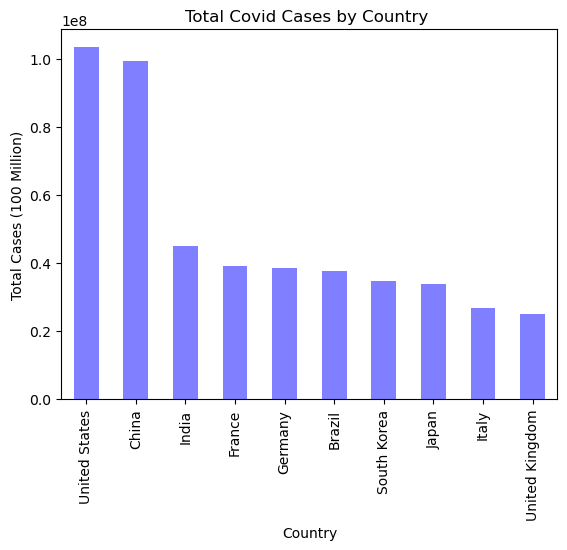

In [33]:
vax_rates_top = vax_rates.nlargest(n=10,columns='Vaccination Rate')
vax_rates_bottom = vax_rates.nsmallest(n=10,columns='Vaccination Rate')
top_cases_chart = top_cases['Total Cases'].plot(kind='bar', color='blue', alpha=0.5, xlabel='Country', ylabel='Total Cases (100 Million)', title='Total Covid Cases by Country ')

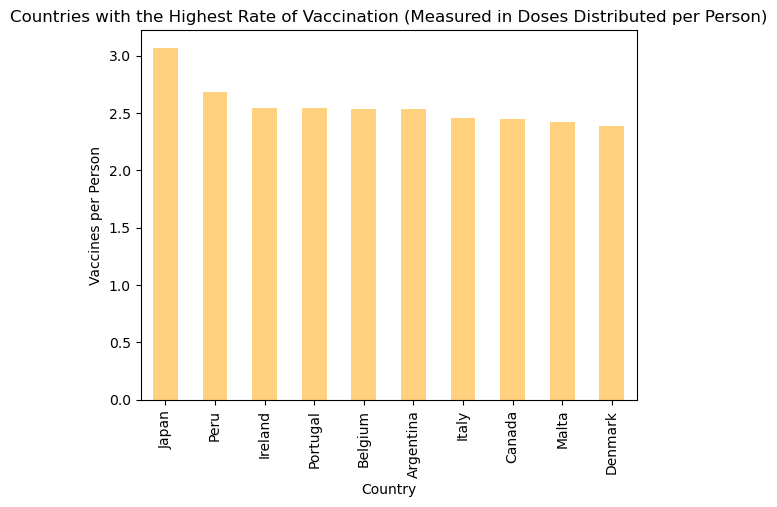

In [34]:
plot_top_vax_rate = vax_rates.nlargest(n=10,columns='Vaccination Rate')
plot_top_vax_rate = plot_top_vax_rate['Vaccination Rate'].plot(
    kind='bar', color='orange', alpha=0.5, xlabel='Country',
    ylabel='Vaccines per Person', title='Countries with the Highest Rate of Vaccination (Measured in Doses Distributed per Person)'
)

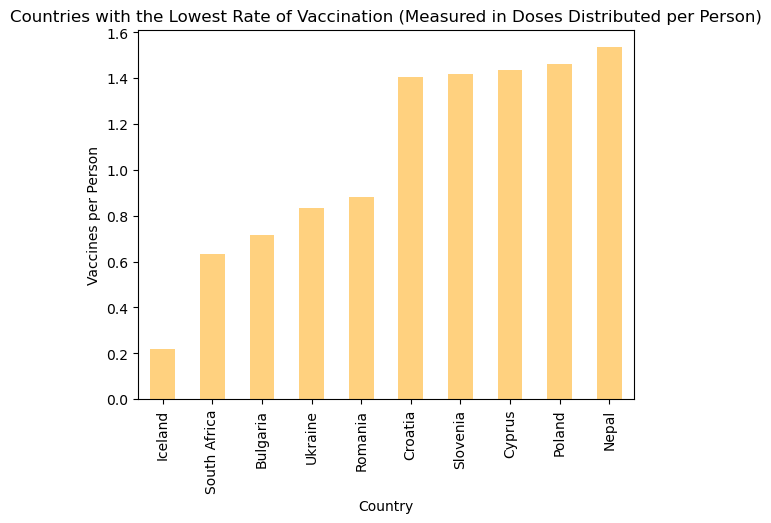

In [35]:
plot_bottom_vax_rate = vax_rates.nsmallest(n=10,columns='Vaccination Rate')
plot_bottom_vax_rate = plot_bottom_vax_rate['Vaccination Rate'].plot(
    kind='bar', color='orange', alpha=0.5, xlabel='Country',
    ylabel='Vaccines per Person', title='Countries with the Lowest Rate of Vaccination (Measured in Doses Distributed per Person)'
)

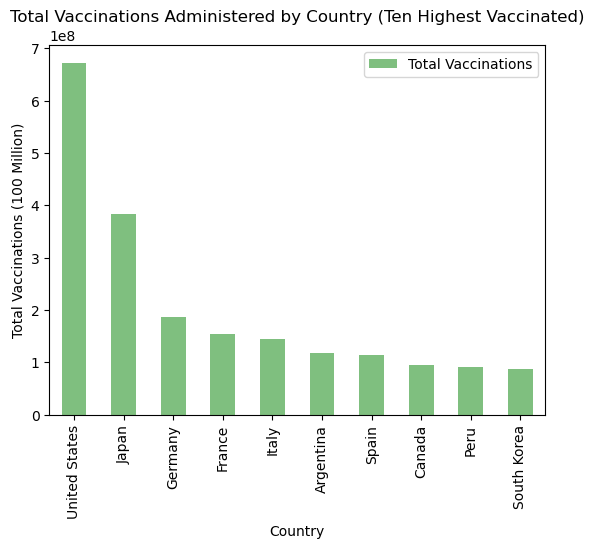

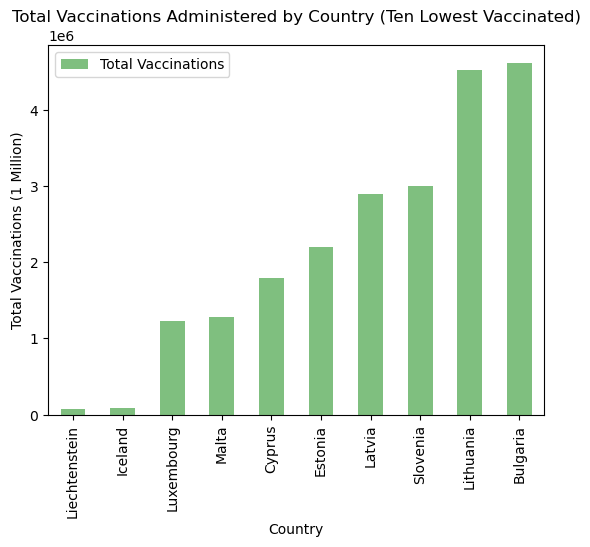

In [36]:
vax_rates['Total Vaccinations'].describe()
vax_rates['Vaccination Rate'].describe()
top_vax_chart = top_vax.plot(kind='bar',color='green',alpha=0.5,xlabel='Country',ylabel='Total Vaccinations (100 Million)', title='Total Vaccinations Administered by Country (Ten Highest Vaccinated)')
low_vax_chart = low_vax.plot(kind='bar',color='green',alpha=0.5,xlabel='Country',ylabel='Total Vaccinations (1 Million)', title='Total Vaccinations Administered by Country (Ten Lowest Vaccinated)')

In [37]:
drop_values = ['Vaccinations:Cases','Vaccinations:Deaths','Total Deaths', '2022']
vax_stat = vax_rates.drop(columns=drop_values)
vax_stat['Case Rate'] = vax_rates['Total Cases'] / vax_rates['2022']
vax_stat.corr(method='pearson')

,Total Cases,Total Vaccinations,Vaccination Rate,Case Rate
Total Cases,1.000000,0.951295,0.247330,0.032366
Total Vaccinations,0.951295,1.000000,0.312504,-0.116917
Vaccination Rate,0.247330,0.312504,1.000000,0.104211
Case Rate,0.032366,-0.116917,0.104211,1.000000
